# Tutorial on running model with Tal's data

In [1]:
#Install from github repository uncomment the following line
#%pip install git+https://github.com/RodrigoZepeda/ABM_Identifiability_python

In [2]:
import pandas as pd
import numpy as np
import amro
import seaborn as sns
import matplotlib_inline.backend_inline
from IPython.core.display import HTML

# Context for figures in jupyter notebook
sns.set(rc={"figure.dpi":200, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

# My obsessive brain needs centered figures:
# https://stackoverflow.com/a/66493988
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### Data reading

I've already transformed the data so it looks like this:

In [3]:
total_patients_per_ward = pd.read_csv("../data/wards_py.csv")
total_patients_per_ward.head()

,day,ward,count
0,0,1,3.0
1,0,2,8.0
2,0,3,23.0
3,0,4,16.0
4,0,5,3.0


In [4]:
total_patients_per_ward = np.array(total_patients_per_ward)

The same happens with the wards information

In [5]:
ward_matrix = pd.read_csv("../data/patients_py.csv")
ward_matrix.head()

,day,ward,MRN,is_new,weight,next_day
0,0,1,1,1,1.0,1510
1,0,1,2,1,1.0,1511
2,0,1,3,1,1.0,1512
3,0,2,4,1,1.0,1513
4,0,2,5,1,1.0,1514


Column `is_new` is equal to 1 if the patient is its first day (new arrival) or 0 if it was already there the previous day. `next_day` corresponds to the row number where the patient appears in `day + 1`. If they don't appear in `day + 1` they are set to negative. 

In [6]:
initial_patients = ward_matrix[ward_matrix["day"] == 0].shape[0]
ward_matrix = np.array(ward_matrix)

I'm going to test 100 different parameters but one can easily test the same parameters with 100 different initial conditions or the same parameters and same initial conditions

In [7]:
#Create 100 simulations and run them in ~ 20 seconds
num_parameters = 100

#Initial colonized values represent the probability that each patient starts up colonized
colonized_day_0 = 0.2*np.ones(shape = (initial_patients, num_parameters))

#Create the parameter matrix
parameters = np.array([
                    np.linspace(0.1, 0.1, num_parameters), #Alpha
                    np.linspace(0.5, 0.5, num_parameters), #Beta
                    np.linspace(0.02, 0.02, num_parameters), #Gamma
                    ]).transpose()

simulations_100 = amro.simulate_discrete_model_internal_one(colonized_day_0, ward_matrix, total_patients_per_ward, parameters, 1)


In [9]:
#Create seaborn plot from lines
quantiles_total_pos = amro.summary_of_total_positive(simulations_100, np.array([0.05, 0.95]))

Text(0.5, 0, 'Day')

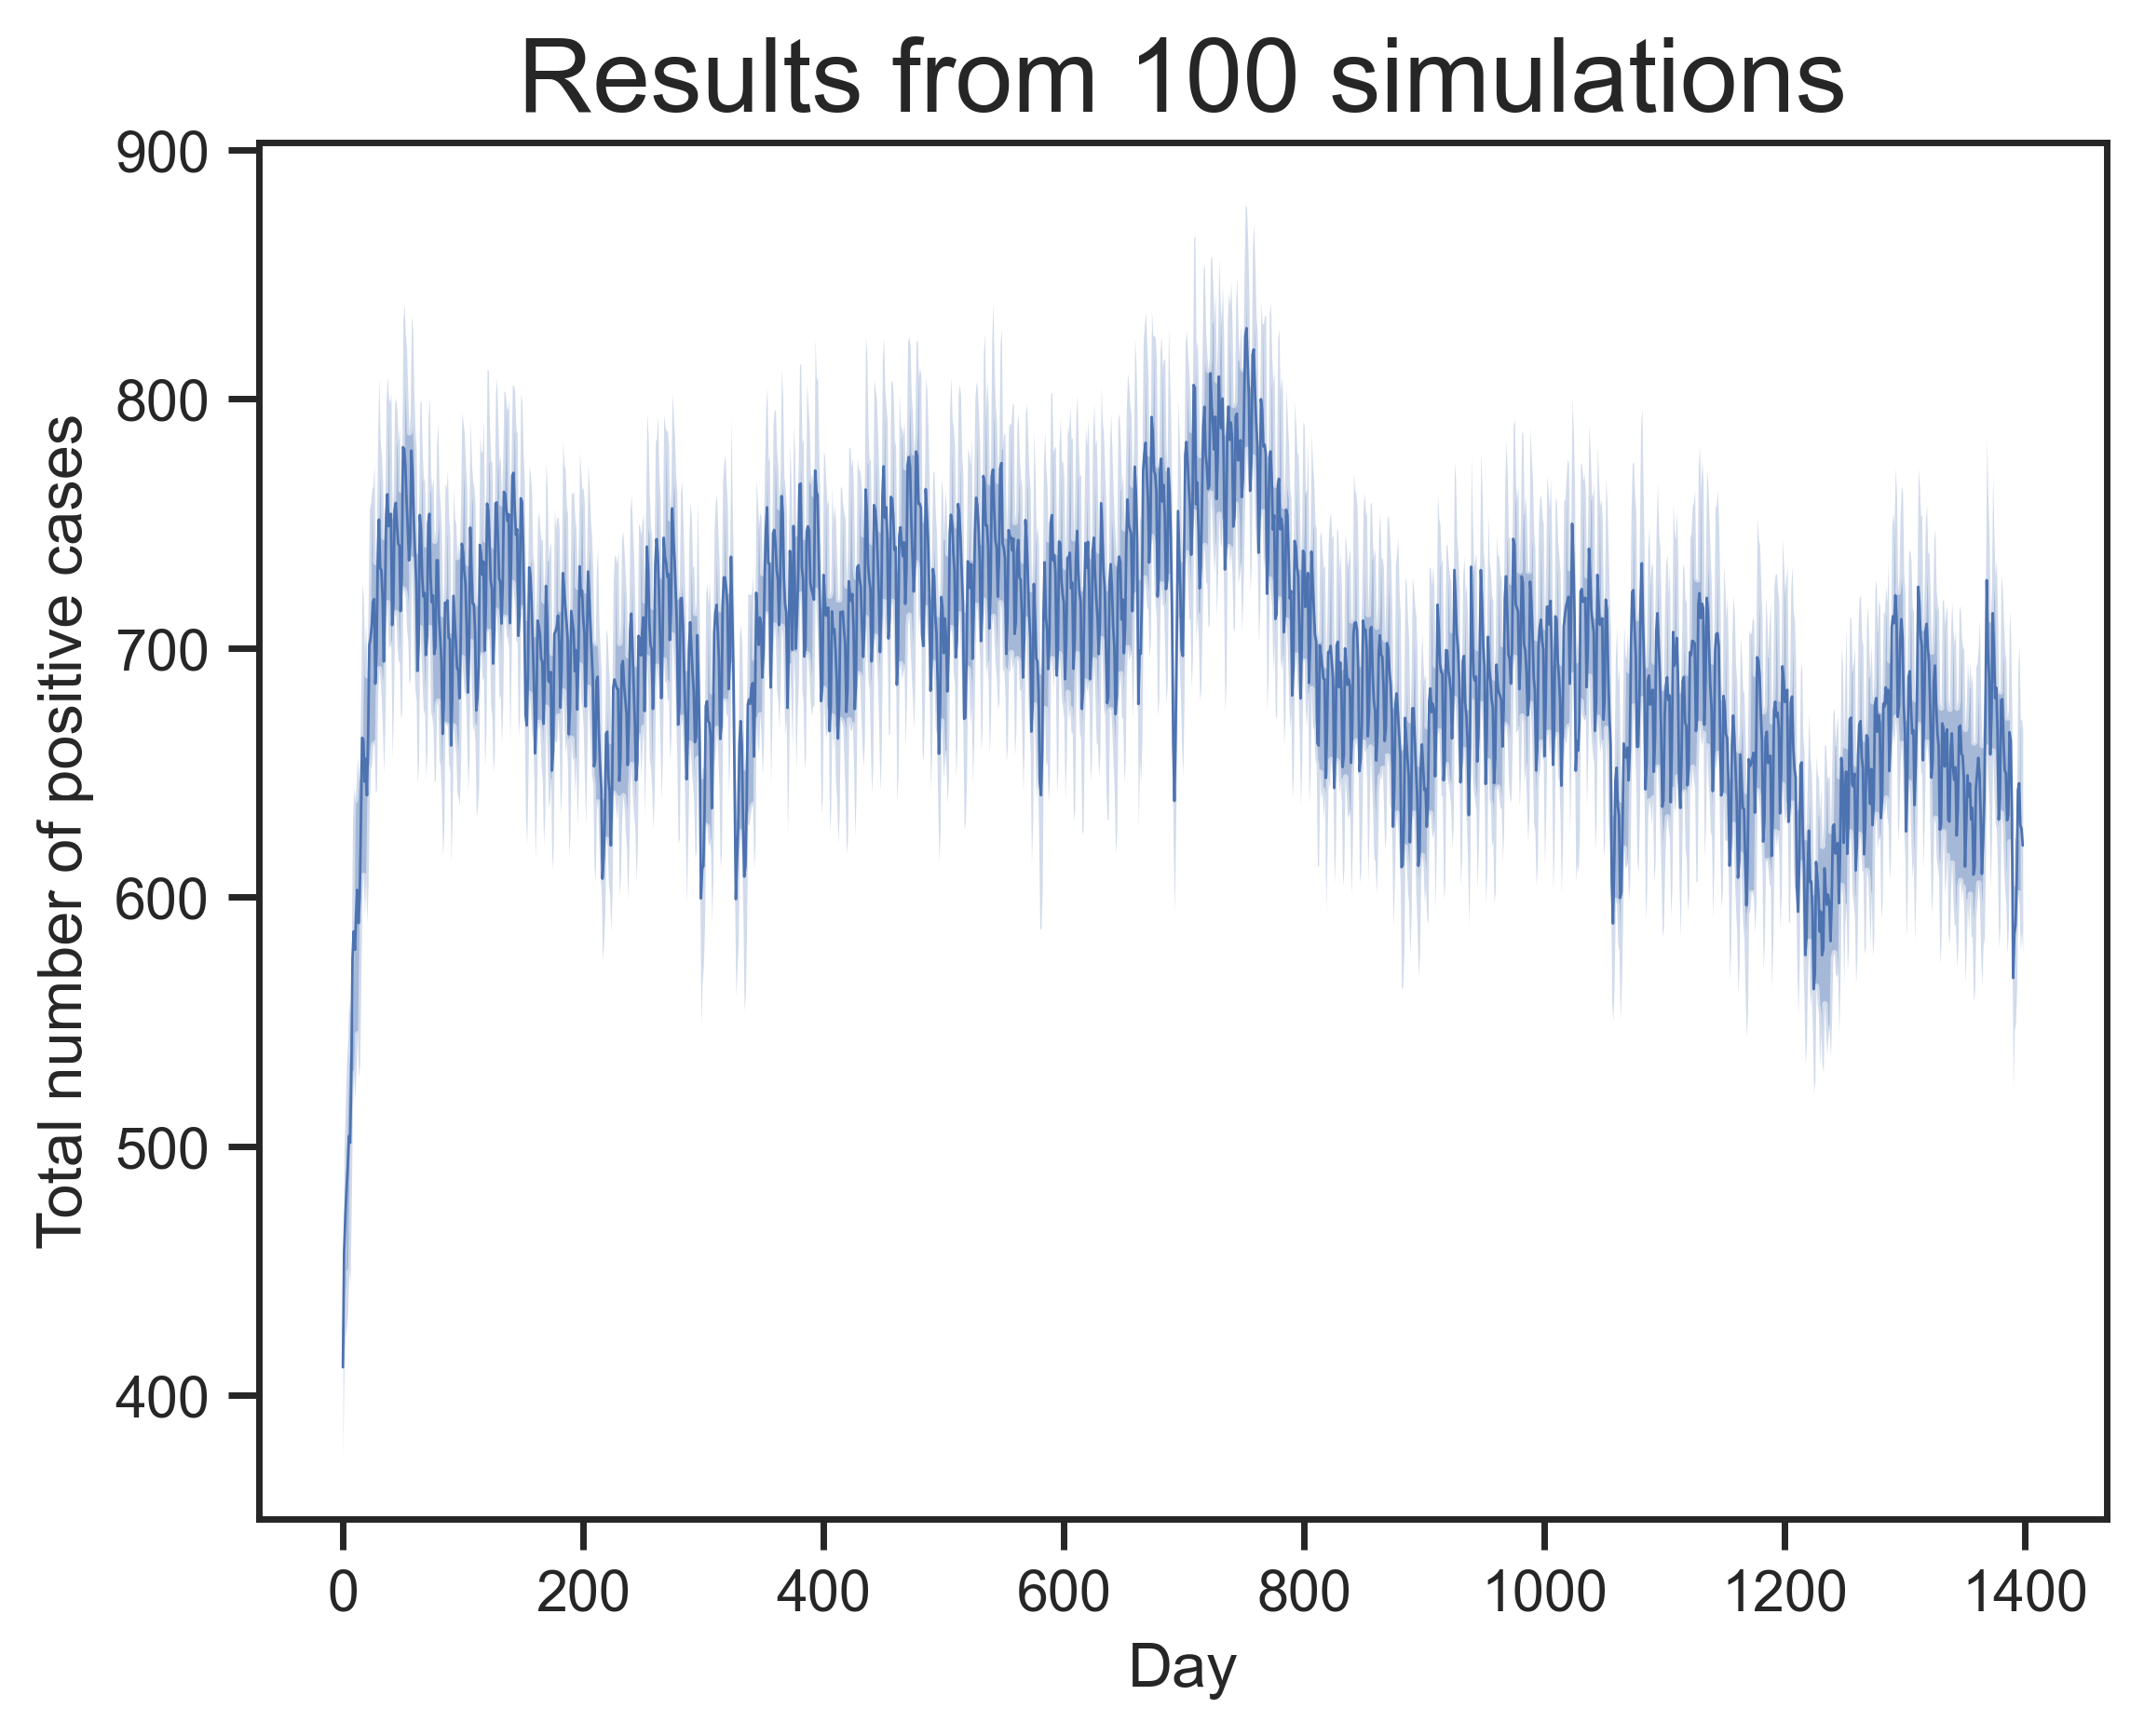

In [10]:
ax = sns.lineplot(x = quantiles_total_pos[:,0], y = quantiles_total_pos[:,1], linewidth = 0.5)
ax.fill_between(quantiles_total_pos[:,0], quantiles_total_pos[:,3], quantiles_total_pos[:,4], alpha=0.5)
ax.set_title('Results from 100 simulations', fontsize=20)
ax.set_ylabel('Total number of positive cases')
ax.set_xlabel('Day')

In [11]:
#Run the model 50 times to calculate how much does it take to run on average as well as the standard deviation
#Note that this time is what it took to run not 1 but 100 simulations
%timeit -n1 -r50 amro.simulate_discrete_model_internal_one(colonized_day_0, ward_matrix, total_patients_per_ward, parameters, 1)

14.9 s ± 1.14 s per loop (mean ± std. dev. of 50 runs, 1 loop each)


### Session info

In [12]:
import session_info
session_info.show()